In [1]:
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from subprocess import check_output
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
%matplotlib inline

In [53]:
age=pd.read_csv("https://storage.googleapis.com/dse6000pro/Wayne_County_Life_Expectancy_by_Zipcode.csv")

In [54]:
age.head()

,ZIPCODE,GEOID10,ALAND10,AWATER10,INTPTLAT10,INTPTLON10,LIFE_EXP
0,48236,2648236,19463663,3357791,42.425373,-82.893194,82
1,48213,2648213,16923386,0,42.397931,-82.995213,70
2,48216,2648216,5747286,0,42.326484,-83.078746,75
3,48221,2648221,14119737,2042,42.427000,-83.148608,74
4,48215,2648215,10395926,0,42.375051,-82.954344,70


In [55]:
#Data cleaning 
age= age.drop(columns="GEOID10")

In [56]:
age.head()

,ZIPCODE,ALAND10,AWATER10,INTPTLAT10,INTPTLON10,LIFE_EXP
0,48236,19463663,3357791,42.425373,-82.893194,82
1,48213,16923386,0,42.397931,-82.995213,70
2,48216,5747286,0,42.326484,-83.078746,75
3,48221,14119737,2042,42.427000,-83.148608,74
4,48215,10395926,0,42.375051,-82.954344,70


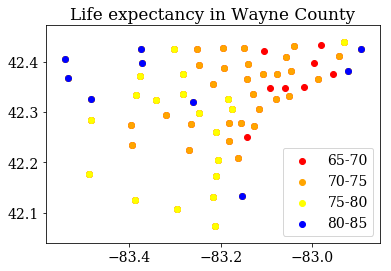

In [45]:
a1 = plt.scatter(y = "INTPTLAT10" , x = "INTPTLON10" ,
                    data = age[(age['INTPTLAT10']>0)  & (age['LIFE_EXP']>65)],color='red',label='65-70')
a2 = plt.scatter(x = "INTPTLON10" , y = "INTPTLAT10" ,
                    data = age[(age['INTPTLAT10']>0)  & (age['LIFE_EXP']>70)],color='orange',label='70-75')
a3 = plt.scatter(x = "INTPTLON10" , y= "INTPTLAT10" ,
                    data = age[(age['INTPTLAT10']>0)  & (age['LIFE_EXP']>75)],color='yellow',label='75-80')
a4 = plt.scatter(y = "INTPTLAT10" , x = "INTPTLON10" ,
                    data = age[(age['INTPTLAT10']>0)  & (age['LIFE_EXP']>80)],color='blue',label='80-85')
plt.title('Life expectancy in Wayne County')
plt.legend(handles=[a1,a2,a3,a4])
plt.show()
 

Text(0.5,1,'Trend of Life Expectancy in Detroit')

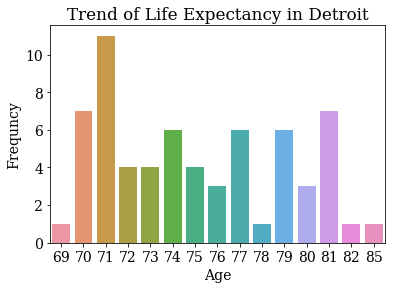

In [65]:
ax=sns.countplot(x='LIFE_EXP', data=age);
ax.set(xlabel='Age', ylabel='Frequncy')
plt.title("Trend of Life Expectancy in Detroit") 

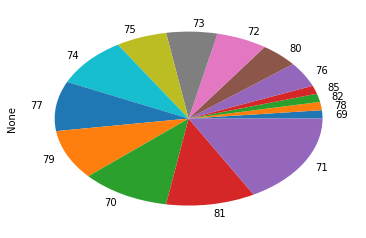

In [10]:
age.groupby([age['LIFE_EXP']]).size().sort_values(ascending=True).plot(kind='pie')

In [13]:
hosp=pd.read_csv("https://storage.googleapis.com/dse6000pro/Hospitals%20(2).csv")

In [14]:
hosp.head()

,OBJECTID,the_geom,Longitude,Latitude,FACNAME,BEDS,ADDRESS,CITY,CONTACT,CONPHONE,ZIPCODE
0,2,POINT (-83.05995248583335 42.35680777815136),-83.059952,42.356808,Department of Veterans Affairs Detroit Medical...,432,4646 John R Rd.,Detroit,Department of Veteran Affair,(313) 562-6000,48201
1,9,POINT (-82.91405691453649 42.41916225569439),-82.914057,42.419162,St. John Hospital & Medical Ctr. - Detroit,572,22101 Moross Rd.,Detroit,St. John Health System,(313) 343-4000,48236
2,3,POINT (-83.0546465344995 42.35246675958835),-83.054647,42.352467,Detroit Receiving Hospital,279,4201 Saint Antoine Ave.,Detroit,Detroit Medical Center,(313) 745-3000,48207
3,7,POINT (-83.05675507389921 42.35670809266596),-83.056755,42.356708,Hutzel Hospital,244,4707 Saint Antoine Ave.,Detroit,Detroit Medical Center,(313) 745-7555,48207
4,4,POINT (-83.18232093970947 42.41807832889761),-83.182321,42.418078,Grace/Sinai Hospital,551,6071 W. Outer Dr.,Detroit,Detroit Medical Center,(313) 966-3300,48235


In [57]:
#Data cleaning
hosp.columns = [x.lower() for x in hosp.columns]

In [58]:
hosp.head()

,objectid,the_geom,longitude,latitude,facname,beds,address,city,contact,conphone,zipcode
0,2,POINT (-83.05995248583335 42.35680777815136),-83.059952,42.356808,Department of Veterans Affairs Detroit Medical...,432,4646 John R Rd.,Detroit,Department of Veteran Affair,(313) 562-6000,48201
1,9,POINT (-82.91405691453649 42.41916225569439),-82.914057,42.419162,St. John Hospital & Medical Ctr. - Detroit,572,22101 Moross Rd.,Detroit,St. John Health System,(313) 343-4000,48236
2,3,POINT (-83.0546465344995 42.35246675958835),-83.054647,42.352467,Detroit Receiving Hospital,279,4201 Saint Antoine Ave.,Detroit,Detroit Medical Center,(313) 745-3000,48207
3,7,POINT (-83.05675507389921 42.35670809266596),-83.056755,42.356708,Hutzel Hospital,244,4707 Saint Antoine Ave.,Detroit,Detroit Medical Center,(313) 745-7555,48207
4,4,POINT (-83.18232093970947 42.41807832889761),-83.182321,42.418078,Grace/Sinai Hospital,551,6071 W. Outer Dr.,Detroit,Detroit Medical Center,(313) 966-3300,48235


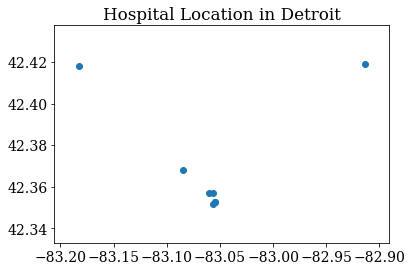

In [59]:
a = plt.scatter(x = "longitude" , y = "latitude" ,
                    data = hosp[(hosp['longitude']<0) ],)
plt.title('Hospital Location in Detroit') 
plt.show()

In [60]:
muap=pd.read_csv("https://storage.googleapis.com/dse6000pro/Detroit_MUAP.csv")

In [61]:
muap.head()

,the_geom,aland10,namelsad10,tractce10,funcstat10,name10,intptlon10,intptlat10,mtfcc10,geoid10,awater10,statefp10,countyfp10,shape_area,shape_leng,srvc_area,MUAP,MUAP_index,MUAP_date,date_updat
0,MULTIPOLYGON (((-83.15892563126202 42.25736606...,1118325,Census Tract 5248,524800,S,5248,-83.161591,42.263100,G5020,26163524800,0,26,163,1.203676e+07,14666.801597,Southwest Detroit Service Area,Medically Underserved Area,42.4,9/27/1994,9/27/1994
1,MULTIPOLYGON (((-83.0767713973331 42.343641331...,1692449,Census Tract 5219,521900,S,5219,-83.080534,42.350399,G5020,26163521900,0,26,163,1.821557e+07,22567.227618,Wayne Service Area,Medically Underserved Area,55.5,5/5/1994,5/5/1994
2,MULTIPOLYGON (((-83.07156338705673 42.34323033...,224907,Census Tract 5218,521800,S,5218,-83.071252,42.346121,G5020,26163521800,0,26,163,2.420654e+06,6800.036678,Wayne Service Area,Medically Underserved Area,55.5,5/5/1994,5/5/1994
3,MULTIPOLYGON (((-83.08486342935502 42.33201429...,1507941,Census Tract 5215,521500,S,5215,-83.076392,42.336860,G5020,26163521500,0,26,163,1.622988e+07,18245.535517,Wayne Service Area,Medically Underserved Area,55.5,5/5/1994,5/5/1994
4,MULTIPOLYGON (((-83.04273017389606 42.32669591...,1348294,Census Tract 5208,520800,S,5208,-83.053797,42.325468,G5020,26163520800,686823,26,163,1.379458e+07,19937.464606,Southwest Detroit Service Area,Medically Underserved Area,42.4,9/27/1994,9/27/1994


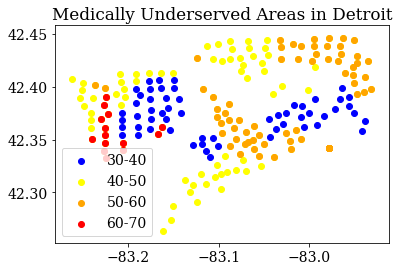

In [50]:

b = plt.scatter(x = "intptlon10" , y = "intptlat10" ,
                    data = muap[(muap['intptlat10']>0)  & (muap['MUAP_index']<40)],color='blue',label='30-40')
b1 = plt.scatter(x = "intptlon10" , y = "intptlat10" ,
                    data = muap[(muap['intptlat10']>0)  & (muap['MUAP_index']>40)],color='yellow',label='40-50')
b2 = plt.scatter(x = "intptlon10" , y = "intptlat10" ,
                    data = muap[(muap['intptlat10']>0)  & (muap['MUAP_index']>50)],color='orange',label='50-60')
b3 = plt.scatter(x = "intptlon10" , y = "intptlat10" ,
                    data = muap[(muap['intptlat10']>0)  & (muap['MUAP_index']>60)],color='red',label='60-70')
plt.title('Medically Underserved Areas in Detroit')

plt.legend(handles=[b,b1,b2,b3])
plt.show()

In [19]:
brfss=pd.read_csv("https://storage.googleapis.com/dse6000pro/Nutrition__Physical_Activity__and_Obesity_-_Behavioral_Risk_Factor_Surveillance_System.csv")

In [20]:
brfss.head()

,YearStart,YearEnd,LocationAbbr,LocationDesc,Datasource,Class,Topic,Question,Data_Value_Unit,Data_Value_Type,...,GeoLocation,ClassID,TopicID,QuestionID,DataValueTypeID,LocationID,StratificationCategory1,Stratification1,StratificationCategoryId1,StratificationID1
0,2011,2011,AL,Alabama,Behavioral Risk Factor Surveillance System,Obesity / Weight Status,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,NaN,Value,...,"(32.84057112200048, -86.63186076199969)",OWS,OWS1,Q036,VALUE,1,Total,Total,OVR,OVERALL
1,2011,2011,AL,Alabama,Behavioral Risk Factor Surveillance System,Obesity / Weight Status,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,NaN,Value,...,"(32.84057112200048, -86.63186076199969)",OWS,OWS1,Q036,VALUE,1,Gender,Male,GEN,MALE
2,2011,2011,AL,Alabama,Behavioral Risk Factor Surveillance System,Obesity / Weight Status,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,NaN,Value,...,"(32.84057112200048, -86.63186076199969)",OWS,OWS1,Q036,VALUE,1,Gender,Female,GEN,FEMALE
3,2011,2011,AL,Alabama,Behavioral Risk Factor Surveillance System,Obesity / Weight Status,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,NaN,Value,...,"(32.84057112200048, -86.63186076199969)",OWS,OWS1,Q036,VALUE,1,Education,Less than high school,EDU,EDUHS
4,2011,2011,AL,Alabama,Behavioral Risk Factor Surveillance System,Obesity / Weight Status,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,NaN,Value,...,"(32.84057112200048, -86.63186076199969)",OWS,OWS1,Q036,VALUE,1,Education,High school graduate,EDU,EDUHSGRAD


In [21]:
#Data cleaning
#Getting Rid of All Extraneous Info

brfss.drop(['Low_Confidence_Limit','High_Confidence_Limit ','YearEnd','Topic','Class','Datasource','Data_Value_Unit','QuestionID','ClassID','TopicID','DataValueTypeID','Data_Value_Type','Data_Value_Footnote_Symbol','Data_Value_Footnote','StratificationCategoryId1','StratificationID1'],1);

In [22]:
#Create separate Dataform from df by gender df2, by education level dfedu, and by income dfedu

brfss2=brfss[(brfss['Stratification1']=='Male')|(brfss['Stratification1']=='Female')]
brfssedu=brfss[brfss['StratificationCategory1']=='Education']
brfssinc=brfss[brfss['StratificationCategory1']=='Income']

#reset index for each of the new dataforms

brfss2 = brfss2.reset_index(drop = True)
brfssedu = brfssedu.reset_index(drop = True)
brfssinc = brfssinc.reset_index(drop = True)

In [23]:
#Each category has the same survey questions

brfss2['Question'].unique()

array(['Percent of adults aged 18 years and older who have obesity',
       'Percent of adults aged 18 years and older who have an overweight classification',
       'Percent of adults who report consuming fruit less than one time daily',
       'Percent of adults who report consuming vegetables less than one time daily',
       'Percent of adults who achieve at least 150 minutes a week of moderate-intensity aerobic physical activity or 75 minutes a week of vigorous-intensity aerobic activity (or an equivalent combination)',
       'Percent of adults who achieve at least 150 minutes a week of moderate-intensity aerobic physical activity or 75 minutes a week of vigorous-intensity aerobic physical activity and engage in muscle-strengthening activities on 2 or more days a week',
       'Percent of adults who achieve at least 300 minutes a week of moderate-intensity aerobic physical activity or 150 minutes a week of vigorous-intensity aerobic activity (or an equivalent combination)',
     

In [24]:
#here we are interested in the survey question directly about obesity and overweight percent

X=['Percent of adults aged 18 years and older who have obesity','Percent of adults aged 18 years and older who have an overweight classification']


brfss2=brfss2[brfss2['Question']==X[0]]


In [25]:
#Creating data including only Michigan State records
brfssmi=brfss2[brfss2['LocationDesc']=='Michigan']

In [26]:
brfssmi.head()

,YearStart,YearEnd,LocationAbbr,LocationDesc,Datasource,Class,Topic,Question,Data_Value_Unit,Data_Value_Type,...,GeoLocation,ClassID,TopicID,QuestionID,DataValueTypeID,LocationID,StratificationCategory1,Stratification1,StratificationCategoryId1,StratificationID1
1067,2011,2011,MI,Michigan,Behavioral Risk Factor Surveillance System,Obesity / Weight Status,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,NaN,Value,...,"(44.6613195430005, -84.71439026999968)",OWS,OWS1,Q036,VALUE,26,Gender,Male,GEN,MALE
1068,2011,2011,MI,Michigan,Behavioral Risk Factor Surveillance System,Obesity / Weight Status,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,NaN,Value,...,"(44.6613195430005, -84.71439026999968)",OWS,OWS1,Q036,VALUE,26,Gender,Female,GEN,FEMALE
1085,2012,2012,MI,Michigan,Behavioral Risk Factor Surveillance System,Obesity / Weight Status,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,NaN,Value,...,"(44.6613195430005, -84.71439026999968)",OWS,OWS1,Q036,VALUE,26,Gender,Male,GEN,MALE
1086,2012,2012,MI,Michigan,Behavioral Risk Factor Surveillance System,Obesity / Weight Status,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,NaN,Value,...,"(44.6613195430005, -84.71439026999968)",OWS,OWS1,Q036,VALUE,26,Gender,Female,GEN,FEMALE
1091,2013,2013,MI,Michigan,Behavioral Risk Factor Surveillance System,Obesity / Weight Status,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,NaN,Value,...,"(44.6613195430005, -84.71439026999968)",OWS,OWS1,Q036,VALUE,26,Gender,Male,GEN,MALE


In [27]:
#separate out national so that we can calculate the national obesity rate for 2014
brfss2n=brfss2[(brfss2['LocationDesc']=='National')]

In [28]:
#calculate Michigan State obesity rate
mi=sum(brfssmi['Data_Value'])/len(brfssmi)
print(mi)

31.375


In [33]:
#group data by state and take the mean of men and women rates for each state

sorted_brfss = brfss2.sort_values(['LocationDesc'], ascending = [True])
sorted_brfss=sorted_brfss[['LocationAbbr','LocationDesc','Data_Value','Gender']]
sorted_brfss = sorted_brfss.groupby('LocationDesc', as_index=False).mean()

#calculate the average (over men and women) obesity rate for the country

natmeanobesity=sum(brfss2n['Data_Value'])/len(brfss2n)
print(natmeanobesity)

28.45833333333334


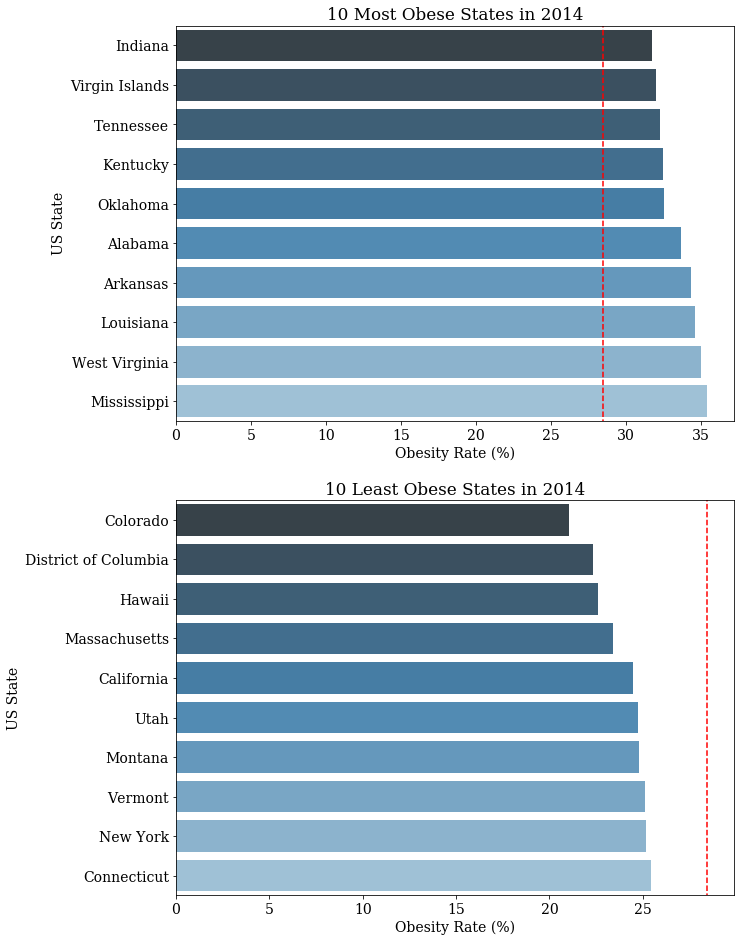

In [34]:
#Let's plot a bar graph of the most and least obese states in the US
#Mark the national average in red

#For those that have LaTex
#plt.rc('text', usetex=True)

plt.rc('font', family='serif')
plt.rcParams.update({'font.size': 14})

sorted_brfss = sorted_brfss.sort_values(['Data_Value'], ascending = [True])

plt.figure(figsize = (10,16))

plt.subplot(2,1,1)
ax=sns.barplot(y=sorted_brfss.tail(10).LocationDesc,x=sorted_brfss.tail(10).Data_Value,palette="Blues_d")
ax.set_ylabel('US State')
ax.set_xlabel('Obesity Rate (%)')
ax.set_title('10 Most Obese States in 2014')
plt.plot([natmeanobesity,natmeanobesity],[-1,10], '--',color = 'r')

plt.subplot(2,1,2)
ax=sns.barplot(y=sorted_brfss.head(10).LocationDesc,x=sorted_brfss.head(10).Data_Value,palette="Blues_d")
ax.set_ylabel('US State')
ax.set_xlabel('Obesity Rate (%)')
ax.set_title('10 Least Obese States in 2014')

plt.plot([natmeanobesity,natmeanobesity],[-1,10], '--',color = 'r')

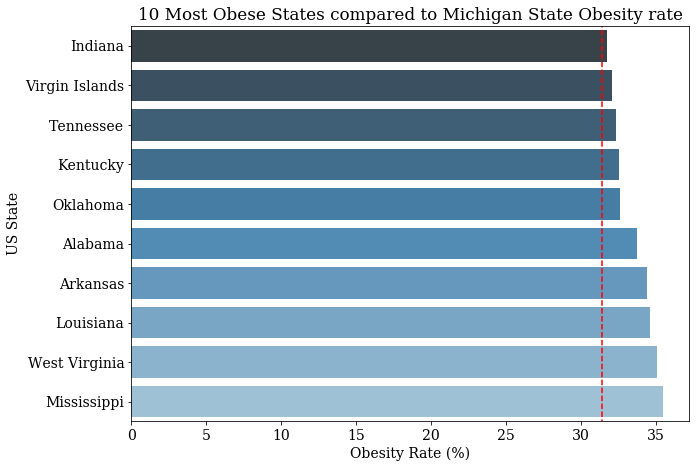

In [38]:
#Let's plot a bar graph of the most and least obese states in the US
#Mark the national average in red

#For those that have LaTex
#plt.rc('text', usetex=True)

plt.rc('font', family='serif')
plt.rcParams.update({'font.size': 14})

sorted_brfss = sorted_brfss.sort_values(['Data_Value'], ascending = [True])

plt.figure(figsize = (10,16))

plt.subplot(2,1,1)
ax=sns.barplot(y=sorted_brfss.tail(10).LocationDesc,x=sorted_brfss.tail(10).Data_Value,palette="Blues_d")
ax.set_ylabel('US State')
ax.set_xlabel('Obesity Rate (%)')
ax.set_title('10 Most Obese States compared to Michigan State Obesity rate')
plt.plot([mi,mi],[-1,10], '--',color = 'r')



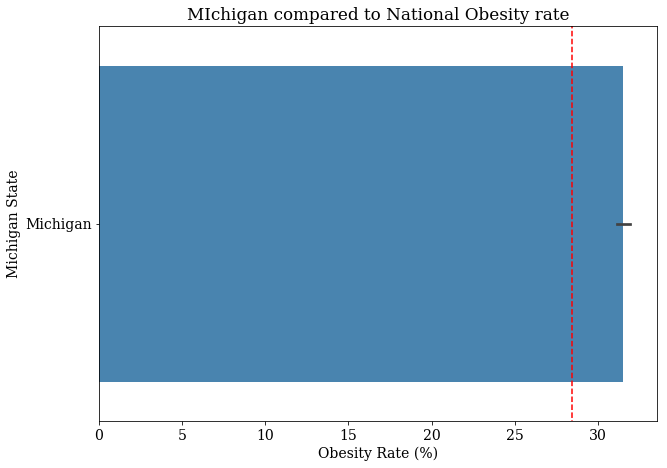

In [36]:
plt.rc('font', family='serif')
plt.rcParams.update({'font.size': 14})

brfssmi = brfssmi.sort_values(['Data_Value'], ascending = [True])

plt.figure(figsize = (10,16))

plt.subplot(2,1,1)
ax=sns.barplot(y=brfssmi.tail(10).LocationDesc,x=brfssmi.tail(10).Data_Value,palette="Blues_d")
ax.set_ylabel('Michigan State')
ax.set_xlabel('Obesity Rate (%)')
ax.set_title('MIchigan compared to National Obesity rate')
plt.plot([natmeanobesity,natmeanobesity],[-1,10], '--',color = 'r')
